This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

TASK 1
• Predict confirmed COVID-19 cases among suspected cases.

TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.

In [210]:
#importing the libraries

In [211]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
import numpy as np
import pandas as pd

EDA PROCESS

In [213]:
df=pd.read_csv('covid_brazil1.csv',names=range(0,77),header=0)

In [214]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA CLEANING

Includes removing of redundant columns.

In [215]:
df.drop(0,axis=1,inplace=True)

In [216]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1-age        2-confirmed result of sars-cov           3-Patient addmited to regular ward (1=yes, 0=no)
# 4-Patient addmited to semi-intensive unit (1=yes, 0=no)         5-Patient addmited to intensive care unit (1=yes, 0=no)


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       187 non-null    float64
 6   7       187 non-null    float64
 7   8       187 non-null    float64
 8   9       187 non-null    float64
 9   10      187 non-null    float64
 10  11      187 non-null    float64
 11  12      187 non-null    float64
 12  13      187 non-null    float64
 13  14      187 non-null    float64
 14  15      187 non-null    float64
 15  16      187 non-null    float64
 16  17      187 non-null    float64
 17  18      187 non-null    float64
 18  19      187 non-null    float64
 19  20      61 non-null     float64
 20  21      543 non-null    object 
 21  22      543 non-null    object 
 22  

In [218]:
df.drop(22,axis=1,inplace=True)

In [219]:
df.shape

(1299, 75)

In [220]:
df.drop(27,axis=1,inplace=True)

In [221]:
df.drop(range(51,74),axis=1,inplace=True)

In [222]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,74,75,76
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df.shape

(1299, 51)

In [224]:
df.drop(74,axis=1,inplace=True)

In [225]:
df.drop(75,axis=1,inplace=True)

In [226]:
df.drop(76,axis=1,inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       187 non-null    float64
 6   7       187 non-null    float64
 7   8       187 non-null    float64
 8   9       187 non-null    float64
 9   10      187 non-null    float64
 10  11      187 non-null    float64
 11  12      187 non-null    float64
 12  13      187 non-null    float64
 13  14      187 non-null    float64
 14  15      187 non-null    float64
 15  16      187 non-null    float64
 16  17      187 non-null    float64
 17  18      187 non-null    float64
 18  19      187 non-null    float64
 19  20      61 non-null     float64
 20  21      543 non-null    object 
 21  23      543 non-null    object 
 22  

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
#checking the null values in visualised form

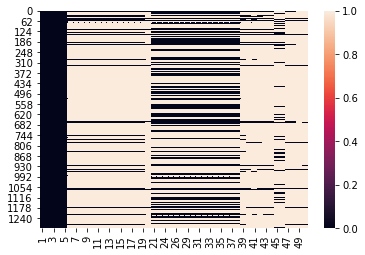

In [230]:
sns.heatmap(df.isnull())

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       187 non-null    float64
 6   7       187 non-null    float64
 7   8       187 non-null    float64
 8   9       187 non-null    float64
 9   10      187 non-null    float64
 10  11      187 non-null    float64
 11  12      187 non-null    float64
 12  13      187 non-null    float64
 13  14      187 non-null    float64
 14  15      187 non-null    float64
 15  16      187 non-null    float64
 16  17      187 non-null    float64
 17  18      187 non-null    float64
 18  19      187 non-null    float64
 19  20      61 non-null     float64
 20  21      543 non-null    object 
 21  23      543 non-null    object 
 22  

In [232]:
from sklearn.impute import SimpleImputer

In [233]:
imp=SimpleImputer(strategy='mean')

In [234]:
for i in range(6,20):
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [235]:
df[20]=imp.fit_transform(df[20].values.reshape(-1,1))

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       1299 non-null   float64
 6   7       1299 non-null   float64
 7   8       1299 non-null   float64
 8   9       1299 non-null   float64
 9   10      1299 non-null   float64
 10  11      1299 non-null   float64
 11  12      1299 non-null   float64
 12  13      1299 non-null   float64
 13  14      1299 non-null   float64
 14  15      1299 non-null   float64
 15  16      1299 non-null   float64
 16  17      1299 non-null   float64
 17  18      1299 non-null   float64
 18  19      1299 non-null   float64
 19  20      1299 non-null   float64
 20  21      543 non-null    object 
 21  23      543 non-null    object 
 22  

In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
le=LabelEncoder()

In [239]:
a=[21,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38]
for i in a:
    df[i]=le.fit_transform(df[i].astype(str))

In [240]:
a=[45,46]
for i in a:
    df[i]=le.fit_transform(df[i].astype(str))

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       1299 non-null   float64
 6   7       1299 non-null   float64
 7   8       1299 non-null   float64
 8   9       1299 non-null   float64
 9   10      1299 non-null   float64
 10  11      1299 non-null   float64
 11  12      1299 non-null   float64
 12  13      1299 non-null   float64
 13  14      1299 non-null   float64
 14  15      1299 non-null   float64
 15  16      1299 non-null   float64
 16  17      1299 non-null   float64
 17  18      1299 non-null   float64
 18  19      1299 non-null   float64
 19  20      1299 non-null   float64
 20  21      1299 non-null   int32  
 21  23      1299 non-null   int32  
 22  

In [242]:
for i in range(39,51):
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1299 non-null   int64  
 1   2       1299 non-null   object 
 2   3       1299 non-null   int64  
 3   4       1299 non-null   int64  
 4   5       1299 non-null   int64  
 5   6       1299 non-null   float64
 6   7       1299 non-null   float64
 7   8       1299 non-null   float64
 8   9       1299 non-null   float64
 9   10      1299 non-null   float64
 10  11      1299 non-null   float64
 11  12      1299 non-null   float64
 12  13      1299 non-null   float64
 13  14      1299 non-null   float64
 14  15      1299 non-null   float64
 15  16      1299 non-null   float64
 16  17      1299 non-null   float64
 17  18      1299 non-null   float64
 18  19      1299 non-null   float64
 19  20      1299 non-null   float64
 20  21      1299 non-null   int32  
 21  23      1299 non-null   int32  
 22  

In [244]:
#so finally we have replaced all the null values with mean,median or most_frequent values 
#and as well removed the null values as we can infer from the below.

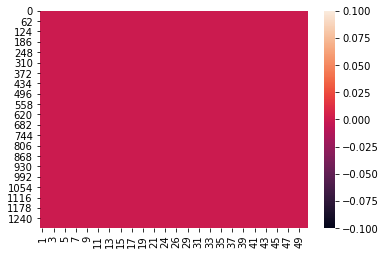

In [245]:
sns.heatmap(df.isna())

In [246]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,13,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,-0.147895,2.089928,-0.305787,0.862512,1.0,1.0,-0.182396,-0.23128,-0.246378,0.152536
2,8,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
3,5,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
4,15,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536


In [247]:
#first we will predict whether the person is sars cov positive or negative based on other attributes

In [248]:
x=df.drop(2,axis=1)

In [249]:
x.shape

(1299, 47)

In [250]:
y=df[2].values
y=y.reshape(-1,1)
y.shape

(1299, 1)

In [251]:
#reducing the dimensionality using pca

In [252]:
from sklearn.decomposition import PCA

In [253]:
pca=PCA(n_components=9)

In [254]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [255]:
x.head()

,0,1,2,3,4,5,6,7,8
0,4.132510,-1.586142,0.103803,-0.076308,-0.134833,-0.116379,0.006060,-0.029272,0.026705
1,8.140964,2.100195,0.470198,1.075004,0.250287,1.959387,0.082664,0.366740,-0.036994
2,-0.866504,-1.560710,0.133130,-0.141875,-0.151956,-0.131031,-0.031766,-0.005037,0.007877
3,-3.865912,-1.545451,0.150726,-0.181215,-0.162230,-0.139822,-0.054462,0.009504,-0.003419
4,6.147276,2.099873,0.443840,0.348105,-1.026357,0.942528,-0.162585,-0.280159,0.180877


In [256]:
#data visulaisation

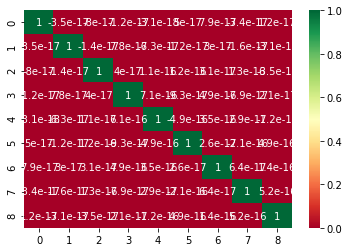

In [257]:
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn') 

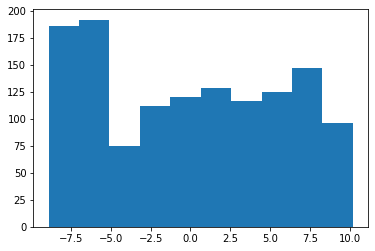

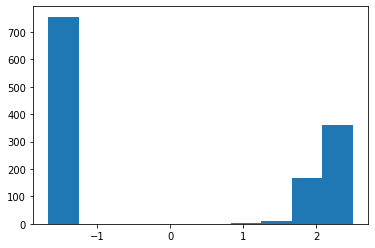

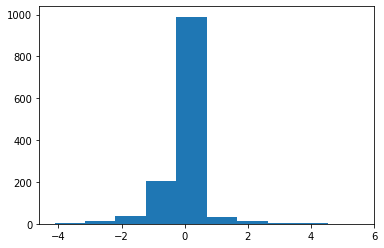

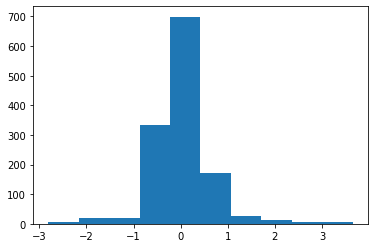

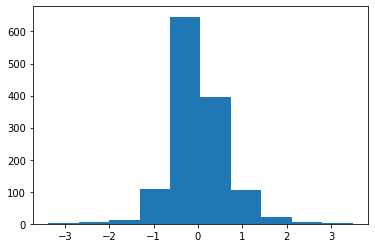

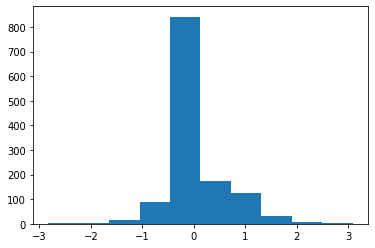

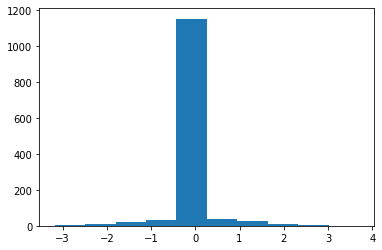

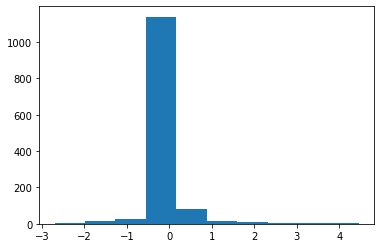

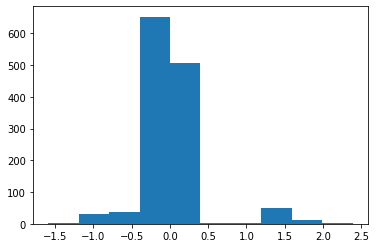

In [258]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

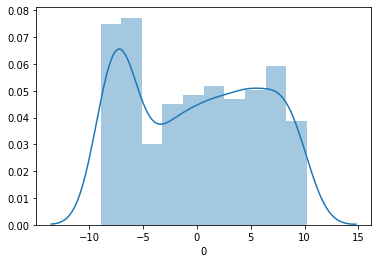

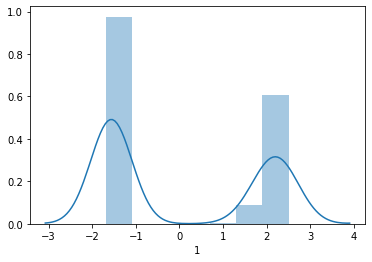

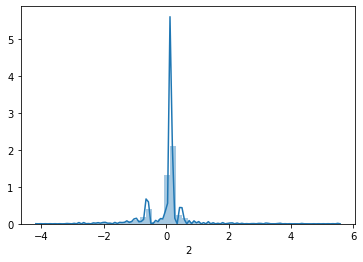

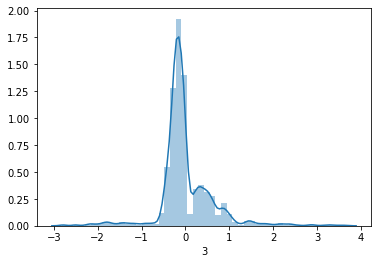

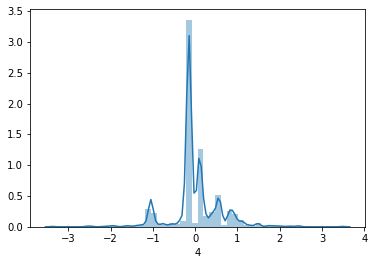

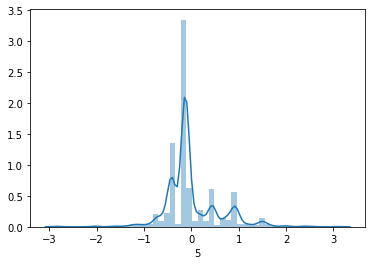

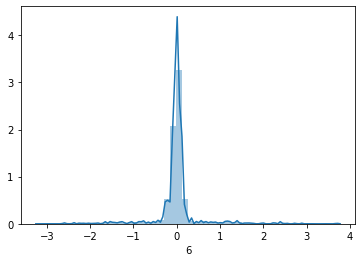

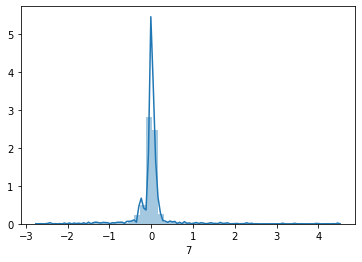

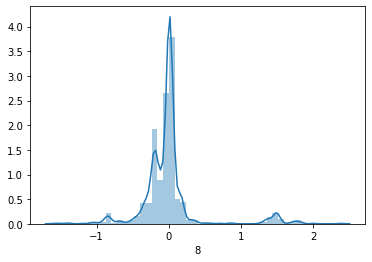

In [259]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])    #plotting he distribution plot

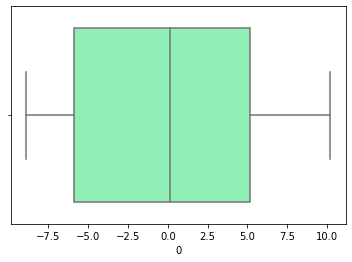

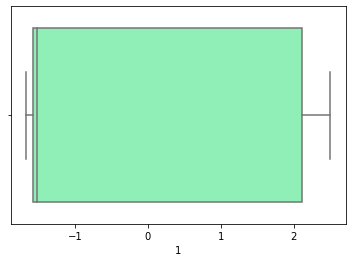

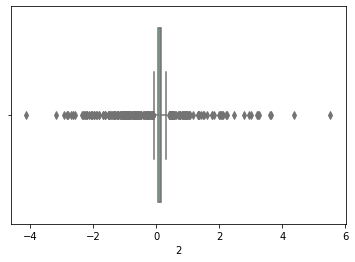

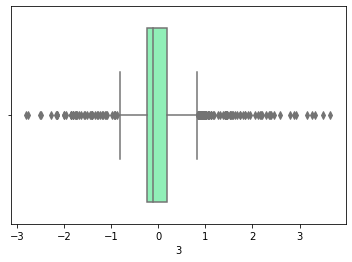

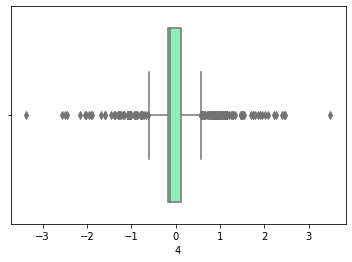

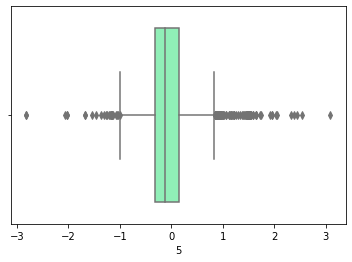

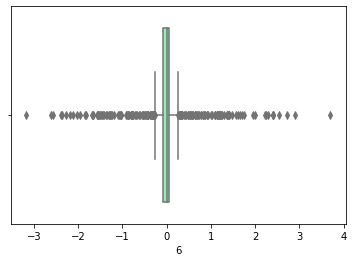

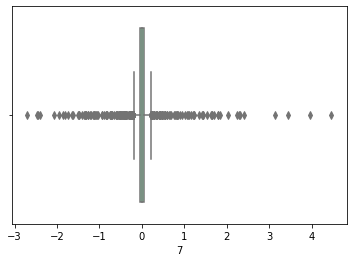

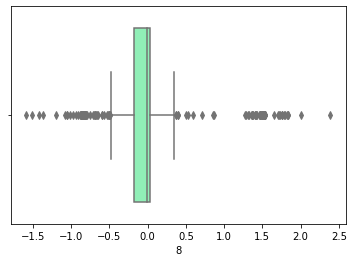

In [260]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x[i],palette='rainbow')          #from the below graph we can infer that outliers is present in the dataset

In [261]:
#removing outliers

In [262]:
from scipy.stats import zscore

In [263]:
z=np.abs(zscore(x))

In [264]:
print(np.where(z>3))

(array([   1,    8,    8,   15,   15,   15,   22,   22,   28,   51,   55,
         55,   56,   59,   59,   71,   71,   72,   74,   76,   78,   78,
         78,   78,   84,   84,   86,   87,   87,   88,   88,  105,  105,
        106,  110,  110,  115,  119,  126,  126,  128,  128,  128,  143,
        143,  143,  143,  143,  144,  145,  146,  146,  146,  152,  153,
        153,  153,  154,  166,  166,  166,  168,  169,  170,  186,  192,
        193,  193,  193,  194,  194,  196,  196,  202,  202,  202,  203,
        205,  205,  205,  205,  224,  226,  226,  232,  233,  263,  291,
        294,  294,  297,  303,  307,  319,  330,  330,  366,  370,  381,
        381,  385,  403,  412,  412,  412,  412,  412,  412,  413,  443,
        443,  443,  443,  443,  454,  454,  462,  465,  465,  474,  475,
        477,  478,  482,  498,  509,  509,  519,  524,  552,  552,  552,
        560,  562,  563,  568,  569,  570,  570,  570,  613,  635,  636,
        639,  653,  663,  663,  663,  663,  671,  

In [265]:
x_new=x[(z<3).all(axis=1)]   #x_new is the set of values with no outliers present

In [266]:
x_new.shape

(1130, 9)

In [267]:
#performing standardisation of data to bring mean to 0 and std and var to 1

In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
std=StandardScaler()
x=std.fit_transform(x)

In [270]:
x=pd.DataFrame(data=x)

In [271]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.687221,-0.856780,0.155013,-0.123628,-0.231623,-0.205315,0.012868,-0.067502,0.064329
1,1.353811,1.134454,0.702167,1.741629,0.429956,3.456722,0.175523,0.845708,-0.089113
2,-0.144096,-0.843043,0.198809,-0.229853,-0.261039,-0.231163,-0.067449,-0.011616,0.018975
3,-0.642886,-0.834800,0.225086,-0.293589,-0.278688,-0.246672,-0.115640,0.021916,-0.008237
4,1.022268,1.134280,0.662805,0.563971,-1.763133,1.662795,-0.345220,-0.646051,0.435705


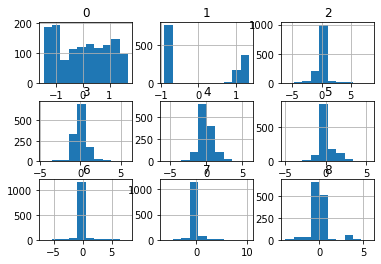

In [272]:
x.hist()         #histogram after data standardization
plt.show()

<Figure size 720x360 with 0 Axes>

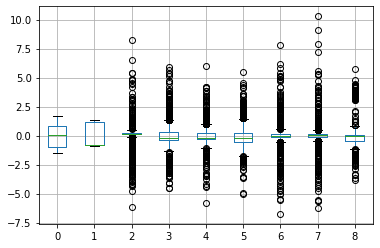

<Figure size 720x360 with 0 Axes>

In [273]:
x.boxplot()
plt.figure(figsize=(10,5))

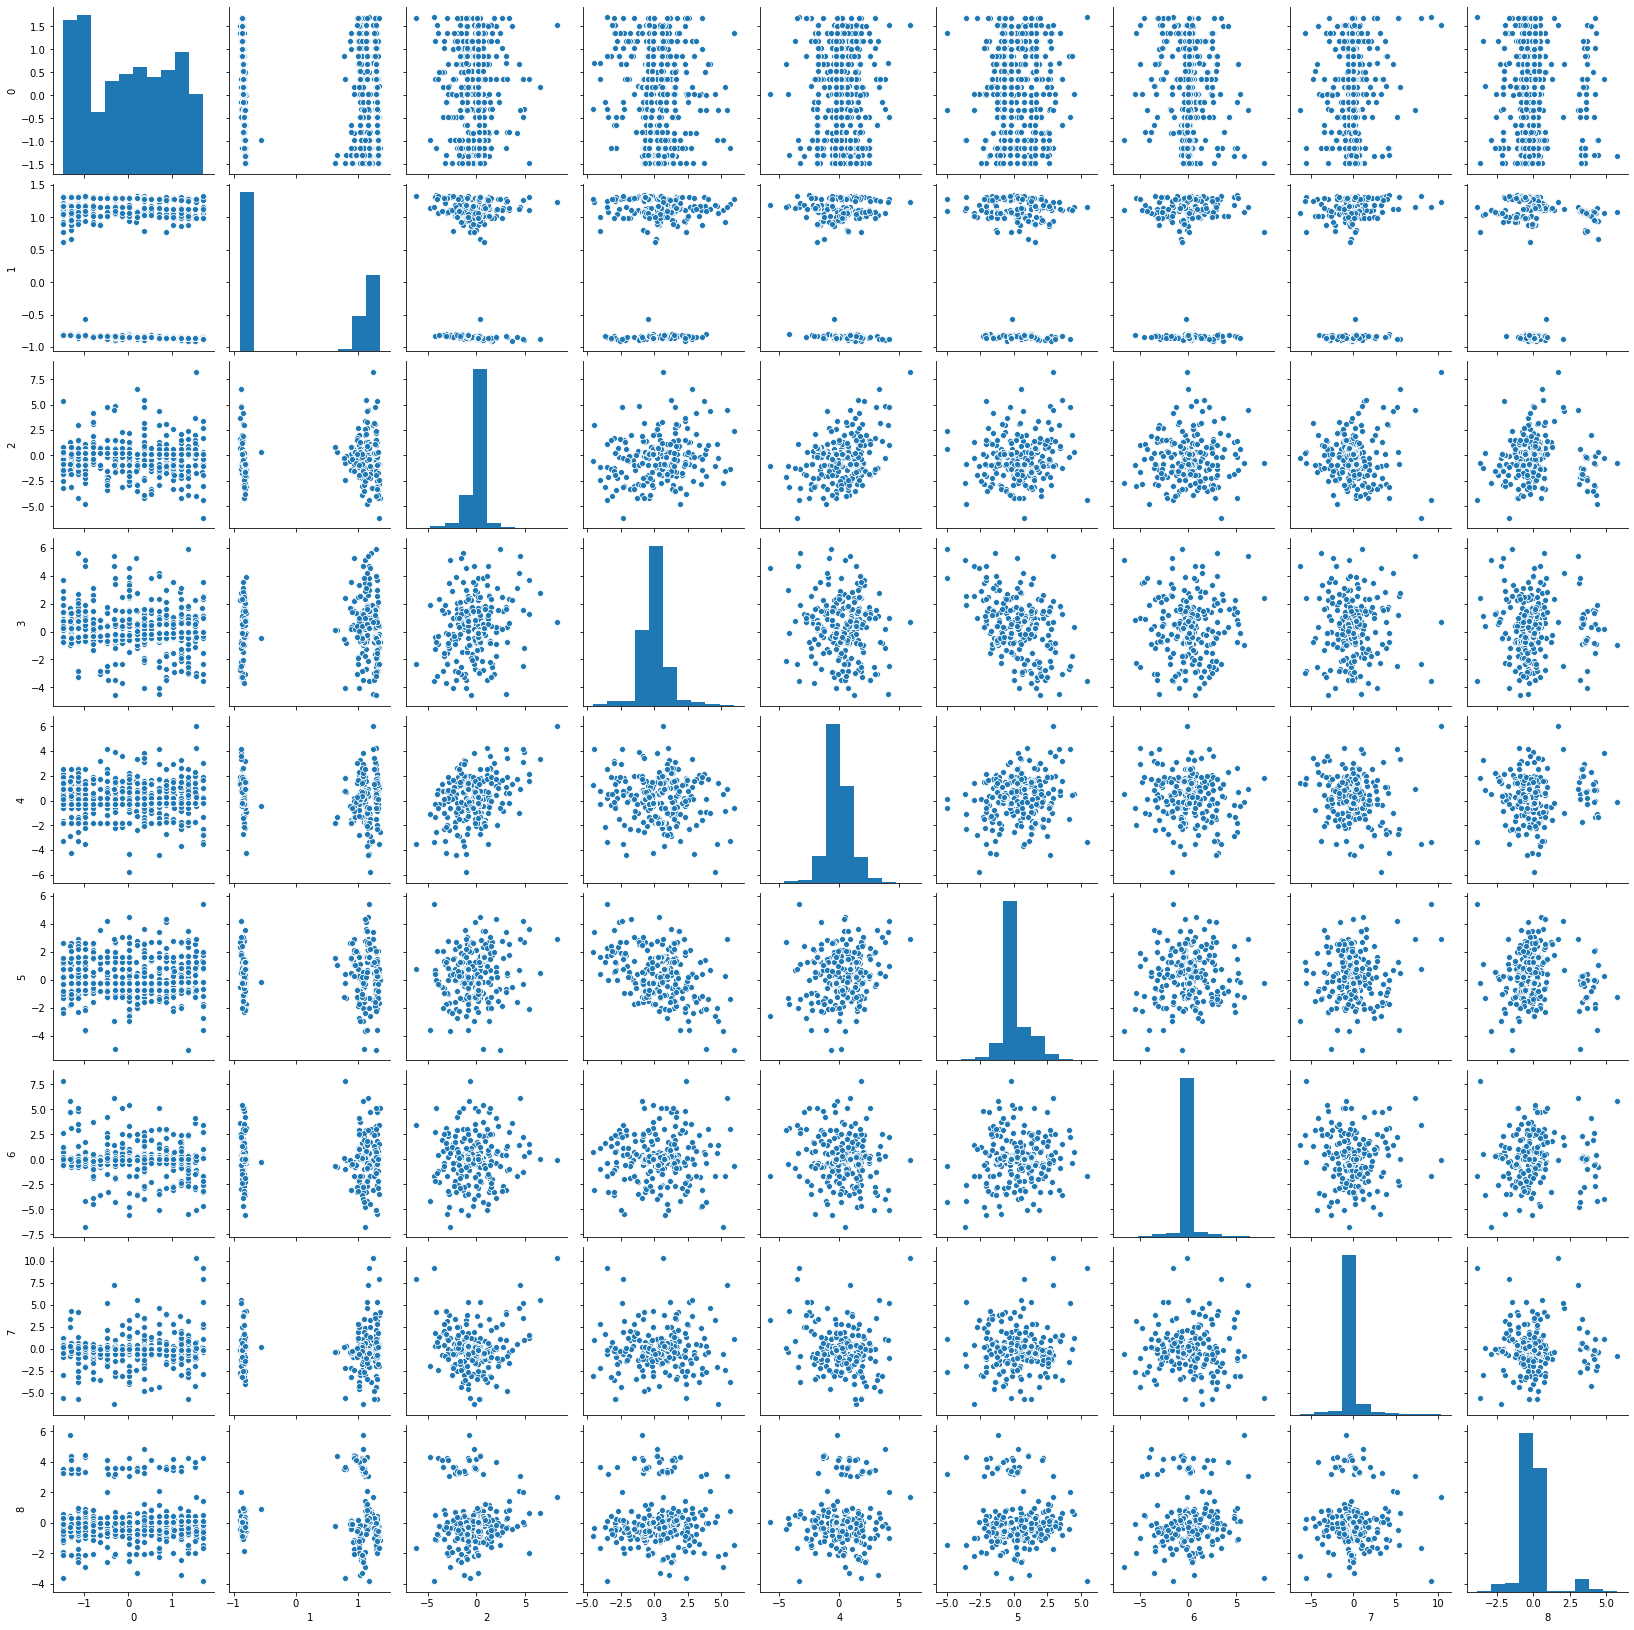

In [274]:
sns.pairplot(x)

In [275]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03
mean,-2.275145e-16,-3.521262e-17,5.880165e-17,-5.837431e-17,-8.170694e-17,-2.999910e-17,-6.344093e-17,-2.623853e-17,3.337506e-17
std,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00
min,-1.482512e+00,-9.037461e-01,-6.156759e+00,-4.551714e+00,-5.796306e+00,-4.988821e+00,-6.747541e+00,-6.234135e+00,-3.831700e+00
25%,-9.783692e-01,-8.485377e-01,1.024578e-01,-3.785697e-01,-2.845711e-01,-5.440238e-01,-1.477666e-01,-1.010344e-01,-4.213651e-01
50%,2.216713e-02,-8.238104e-01,1.812904e-01,-1.873632e-01,-2.139741e-01,-2.208237e-01,1.286799e-02,2.191589e-02,-1.730780e-02
75%,8.554280e-01,1.143978e+00,2.513639e-01,3.096921e-01,2.257706e-01,2.593127e-01,1.378635e-01,1.349627e-01,8.247090e-02
max,1.697204e+00,1.351600e+00,8.241514e+00,5.917455e+00,5.993148e+00,5.451738e+00,7.856263e+00,1.029426e+01,5.753136e+00


In [276]:
#perfoming classfication techniques

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [278]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("accuracy score corrosponding to r_state",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print()
print()
print("max accuracy score for the final random state:",r_state,"is:",max_acc_score) 

score=cross_val_score(lg,x,y,cv=5).mean()
print("cross val score is",score)

accuracy score corrosponding to r_state 42 is: 0.986013986013986
accuracy score corrosponding to r_state 43 is: 0.972027972027972
accuracy score corrosponding to r_state 44 is: 0.9790209790209791
accuracy score corrosponding to r_state 45 is: 0.9813519813519813
accuracy score corrosponding to r_state 46 is: 0.9790209790209791
accuracy score corrosponding to r_state 47 is: 0.993006993006993
accuracy score corrosponding to r_state 48 is: 0.9813519813519813
accuracy score corrosponding to r_state 49 is: 0.9836829836829837
accuracy score corrosponding to r_state 50 is: 0.9766899766899767
accuracy score corrosponding to r_state 51 is: 0.9813519813519813
accuracy score corrosponding to r_state 52 is: 0.9906759906759907
accuracy score corrosponding to r_state 53 is: 0.986013986013986
accuracy score corrosponding to r_state 54 is: 0.9836829836829837
accuracy score corrosponding to r_state 55 is: 0.972027972027972
accuracy score corrosponding to r_state 56 is: 0.9883449883449883
accuracy score 

In [279]:
#from the above we can see that our model is predicting the output with the accuracy score of almmost 100%

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)

In [281]:
#using hyper parameter for SVC

In [282]:
#checking with svm

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
param={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [285]:
svc=SVC()
gd=GridSearchCV(estimator=svc,param_grid=param)

In [286]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [287]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [288]:
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [289]:
gd.best_score_

0.9838342738342739

In [290]:
#svm is giving a max of 98% of score

In [291]:
#using knn

In [292]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.9923076923076923
accuracy score for neighbors 2 is: 0.9923076923076923
accuracy score for neighbors 3 is: 0.9923076923076923
accuracy score for neighbors 4 is: 0.9923076923076923
accuracy score for neighbors 5 is: 0.9923076923076923
accuracy score for neighbors 6 is: 0.9923076923076923
accuracy score for neighbors 7 is: 0.9923076923076923
accuracy score for neighbors 8 is: 0.9923076923076923
accuracy score for neighbors 9 is: 0.9923076923076923
accuracy score for neighbors 10 is: 0.9923076923076923
accuracy score for neighbors 11 is: 0.9923076923076923
accuracy score for neighbors 12 is: 0.9923076923076923
accuracy score for neighbors 13 is: 0.9923076923076923
accuracy score for neighbors 14 is: 0.9923076923076923
accuracy score for neighbors 15 is: 0.9923076923076923
accuracy score for neighbors 16 is: 0.9923076923076923
accuracy score for neighbors 17 is: 0.9923076923076923
accuracy score for neighbors 18 is: 0.9923076923076923
accuracy score for 

In [293]:
#knn is giving a max of 99% accuracy score

In [294]:
confusion_matrix(y_test,pred2)#we can see from the below that our confusion matrix that we have a very few type 2 error present.

array([[258,   0],
       [  2,   0]], dtype=int64)

In [295]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    pred1=dtc.predict(x_test)
    print("accuracy score for dtc classifier with criterion",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(dtc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for dtc classifier with criterion gini is: 0.9884615384615385
accuracy score for dtc classifier with criterion entropy is: 0.9846153846153847
cross val score is: 0.9784496584496585


In [296]:
#so dtc is giving a max of 99%accuracy score with criteion as gini

In [297]:
confusion_matrix(y_test,pred1)

array([[256,   2],
       [  2,   0]], dtype=int64)

In [298]:
a1=pd.DataFrame({'classifier':('Logistic regression','SVC','KNN','DTC'),'Accuracy  in %':[99.5,98,98,99]})
a1

,classifier,Accuracy in %
0,Logistic regression,99.5
1,SVC,98.0
2,KNN,98.0
3,DTC,99.0


In [299]:
#so finally we will use logistic regressor as our model for prediction

In [300]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)

In [301]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [302]:
a1=pd.DataFrame(data=pred)
a1.to_csv('sarscov_result.csv')   #saving the result in csv form

In [303]:
accuracy_score(y_test,pred)

0.9923076923076923

In [304]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       258
    positive       0.00      0.00      0.00         2

    accuracy                           0.99       260
   macro avg       0.50      0.50      0.50       260
weighted avg       0.98      0.99      0.99       260



In [305]:
confusion_matrix(y_test,pred)

array([[258,   0],
       [  2,   0]], dtype=int64)

In [306]:
#prediicting with other models

In [307]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [308]:
rd=RandomForestClassifier(n_estimators=150)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('accuracy score is:',accuracy_score(y_test,predrd))

accuracy score is: 0.9923076923076923


In [309]:
gd=GradientBoostingClassifier(learning_rate=0.01)
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,predgd))

accuracy score is: 0.9923076923076923


In [310]:
ad=AdaBoostClassifier(base_estimator=dtc,n_estimators=200)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,predad))

accuracy score is: 0.9923076923076923


In [311]:
#from the above we are getting almost 99 % accuracy score with boosting and bagging models

In [106]:
#dumping the final model

In [107]:
from sklearn.externals import joblib

In [108]:
joblib.dump(lg,'covid_brazil.obj')

['covid_brazil.obj']

# TASK 2 • Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.(col-3,4,5)

In [98]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,13,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,-0.147895,2.089928,-0.305787,0.862512,1.0,1.0,-0.182396,-0.23128,-0.246378,0.152536
2,8,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
3,5,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
4,15,negative,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536


# 1. first we will predict ---->>>Patient addmited to regular ward (1=yes, 0=no)


In [118]:
x=df.drop(3,axis=1)

In [119]:
x.head()

,1,2,4,5,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
0,13,negative,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,-0.055590,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
1,17,negative,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,-0.147895,2.089928,-0.305787,0.862512,1.0,1.0,-0.182396,-0.23128,-0.246378,0.152536
2,8,negative,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,-0.055590,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
3,5,negative,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,-0.055590,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
4,15,negative,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,-0.055590,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536


In [120]:
pca=PCA(n_components=9)

In [125]:
x[2]=le.fit_transform(x[2])

In [126]:
x=pca.fit_transform(x)

In [127]:
x=pd.DataFrame(data=x)

In [128]:
x.head()

,0,1,2,3,4,5,6,7,8
0,4.132500,-1.586114,0.103873,-0.076327,-0.134802,-0.116390,0.006276,-0.029005,0.026874
1,8.140952,2.100248,0.470010,1.075527,0.247540,1.960870,0.079829,0.364333,-0.037038
2,-0.866512,-1.560690,0.133219,-0.141869,-0.151859,-0.131126,-0.031610,-0.004813,0.007995
3,-3.865919,-1.545436,0.150826,-0.181194,-0.162094,-0.139968,-0.054342,0.009703,-0.003333
4,6.147266,2.099931,0.443793,0.347936,-1.027540,0.941280,-0.162993,-0.280068,0.181365


In [129]:
y=df[3].values
y=y.reshape(-1,1)
y.shape

(1299, 1)

In [130]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("accuracy score corrosponding to r_state",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print()
print()
print("max accuracy score for the final random state:",r_state,"is:",max_acc_score) 

score=cross_val_score(lg,x,y,cv=5).mean()
print("cross val score is",score)

accuracy score corrosponding to r_state 42 is: 0.9906759906759907
accuracy score corrosponding to r_state 43 is: 0.9766899766899767
accuracy score corrosponding to r_state 44 is: 0.986013986013986
accuracy score corrosponding to r_state 45 is: 0.9813519813519813
accuracy score corrosponding to r_state 46 is: 0.9790209790209791
accuracy score corrosponding to r_state 47 is: 0.986013986013986
accuracy score corrosponding to r_state 48 is: 0.9906759906759907
accuracy score corrosponding to r_state 49 is: 0.9883449883449883
accuracy score corrosponding to r_state 50 is: 0.9836829836829837
accuracy score corrosponding to r_state 51 is: 0.9906759906759907
accuracy score corrosponding to r_state 52 is: 0.9883449883449883
accuracy score corrosponding to r_state 53 is: 0.9906759906759907
accuracy score corrosponding to r_state 54 is: 0.986013986013986
accuracy score corrosponding to r_state 55 is: 0.9883449883449883
accuracy score corrosponding to r_state 56 is: 0.9953379953379954
accuracy scor

In [131]:
#from the above we can see that our model is predicting the output with the accuracy score of almmost 100%

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)

In [144]:
a=['linear','rbf','poly']
for i in a:
    svc=SVC()
    svc.fit(x_train,y_train)
    pred1=svc.predict(x_test)
    print("accuracy score for ",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(svc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for  linear is: 0.9961538461538462
accuracy score for  rbf is: 0.9961538461538462
accuracy score for  poly is: 0.9961538461538462
cross val score is: 0.9892248292248293


In [134]:
#svm is predicting with almost 100% accuracy

In [136]:
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.9884615384615385
accuracy score for neighbors 2 is: 0.9961538461538462
accuracy score for neighbors 3 is: 0.9923076923076923
accuracy score for neighbors 4 is: 0.9961538461538462
accuracy score for neighbors 5 is: 0.9961538461538462
accuracy score for neighbors 6 is: 0.9961538461538462
accuracy score for neighbors 7 is: 0.9961538461538462
accuracy score for neighbors 8 is: 0.9961538461538462
accuracy score for neighbors 9 is: 0.9961538461538462
accuracy score for neighbors 10 is: 0.9961538461538462
accuracy score for neighbors 11 is: 0.9961538461538462
accuracy score for neighbors 12 is: 0.9961538461538462
accuracy score for neighbors 13 is: 0.9961538461538462
accuracy score for neighbors 14 is: 0.9961538461538462
cross val score is: 0.9892248292248293


In [137]:
#knn is also predicting with almost 99.6% accuracy score

In [138]:
confusion_matrix(y_test,pred2)#we can see from the below that our confusion matrix that we have a very few type 2 error present.

array([[259,   0],
       [  1,   0]], dtype=int64)

In [139]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print("accuracy score for dtc classifier is:",accuracy_score(pred1,y_test))

accuracy score for dtc classifier is: 0.9769230769230769


In [140]:
confusion_matrix(y_test,pred1)

array([[254,   5],
       [  1,   0]], dtype=int64)

In [142]:
a1=pd.DataFrame({'classifier':('Logistic regression','SVC','KNN','DTC'),'Accuracy  in %':[99,99.6,99,97.6]})
a1

,classifier,Accuracy in %
0,Logistic regression,99.0
1,SVC,99.6
2,KNN,99.0
3,DTC,97.6


In [143]:
#so finally we will use svm as our model for prediction

In [145]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [146]:
accuracy_score(y_test,pred)

0.9961538461538462

In [147]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       0.00      0.00      0.00         1

    accuracy                           1.00       260
   macro avg       0.50      0.50      0.50       260
weighted avg       0.99      1.00      0.99       260



In [148]:
confusion_matrix(y_test,pred)

array([[259,   0],
       [  1,   0]], dtype=int64)

In [149]:
#dumping the final model

In [151]:
joblib.dump(svc,'covid_brazil_regular_ward.obj')

['covid_brazil_regular_ward.obj']

# 2. now we will predict ---->>>Patient addmited to semi-intensive unit (1=yes, 0=no)


In [153]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,13,0,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,-0.147895,2.089928,-0.305787,0.862512,1.0,1.0,-0.182396,-0.23128,-0.246378,0.152536
2,8,0,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
3,5,0,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536
4,15,0,0,0,0,0.174214,0.168979,-0.063912,0.017276,0.098704,...,-0.053713,-0.043566,-0.024922,0.110781,0.0,0.0,-0.182396,-0.23128,-0.246378,0.152536


In [154]:
x=df.drop(4,axis=1)

In [155]:
pca=PCA(n_components=9)

In [156]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [157]:
x.head()

,0,1,2,3,4,5,6,7,8
0,4.132503,-1.586126,0.103898,-0.076376,-0.134829,-0.116388,0.006296,-0.028857,0.027059
1,8.140956,2.100246,0.469943,1.075155,0.247063,1.960034,0.080615,0.363193,-0.022473
2,-0.866511,-1.560709,0.133251,-0.141971,-0.151755,-0.131119,-0.031628,-0.004816,0.008023
3,-3.865920,-1.545459,0.150862,-0.181328,-0.161911,-0.139957,-0.054383,0.009608,-0.003398
4,6.147268,2.099908,0.444447,0.347621,-1.028070,0.941263,-0.162104,-0.279461,0.181297


In [158]:
y=df[3].values
y=y.reshape(-1,1)
y.shape

(1299, 1)

In [160]:
#standardizing the dataset

In [161]:
std=StandardScaler()
x=std.fit_transform(x)

In [162]:
x=pd.DataFrame(data=x)

In [163]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.687219,-0.856775,0.155159,-0.123739,-0.231640,-0.205322,0.013369,-0.066576,0.065180
1,1.353810,1.134487,0.701807,1.741883,0.424461,3.457715,0.171171,0.837932,-0.054133
2,-0.144098,-0.843046,0.198995,-0.230011,-0.260719,-0.231308,-0.067157,-0.011111,0.019327
3,-0.642888,-0.834808,0.225296,-0.293774,-0.278167,-0.246900,-0.115473,0.022168,-0.008184
4,1.022267,1.134304,0.663732,0.563188,-1.766252,1.660491,-0.344199,-0.644753,0.436715


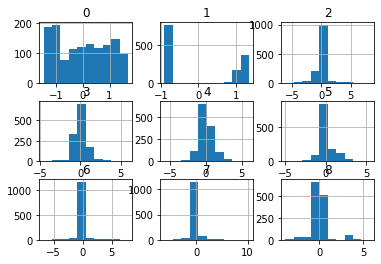

In [164]:
x.hist()         #histogram after data standardization
plt.show()

In [165]:
#predicting with logistic regression

In [166]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("accuracy score corrosponding to r_state",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print()
print()
print("max accuracy score for the final random state:",r_state,"is:",max_acc_score) 

score=cross_val_score(lg,x,y,cv=5).mean()
print("cross val score is",score)

accuracy score corrosponding to r_state 42 is: 0.9906759906759907
accuracy score corrosponding to r_state 43 is: 0.9743589743589743
accuracy score corrosponding to r_state 44 is: 0.986013986013986
accuracy score corrosponding to r_state 45 is: 0.9813519813519813
accuracy score corrosponding to r_state 46 is: 0.9790209790209791
accuracy score corrosponding to r_state 47 is: 0.986013986013986
accuracy score corrosponding to r_state 48 is: 0.9906759906759907
accuracy score corrosponding to r_state 49 is: 0.9883449883449883
accuracy score corrosponding to r_state 50 is: 0.9836829836829837
accuracy score corrosponding to r_state 51 is: 0.9906759906759907
accuracy score corrosponding to r_state 52 is: 0.9883449883449883
accuracy score corrosponding to r_state 53 is: 0.9906759906759907
accuracy score corrosponding to r_state 54 is: 0.986013986013986
accuracy score corrosponding to r_state 55 is: 0.9883449883449883
accuracy score corrosponding to r_state 56 is: 0.9953379953379954
accuracy scor

In [167]:
#from the above we can see that our model is predicting the output with the accuracy score of almmost 100%

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)

In [169]:
#using svm

In [170]:
a=['linear','rbf','poly']
for i in a:
    svc=SVC()
    svc.fit(x_train,y_train)
    pred1=svc.predict(x_test)
    print("accuracy score for ",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(svc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for  linear is: 0.9961538461538462
accuracy score for  rbf is: 0.9961538461538462
accuracy score for  poly is: 0.9961538461538462
cross val score is: 0.9892248292248293


In [171]:
#svm is predicting with almost 100% accuracy

In [173]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)
print("accuracy score for knn is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for knn is: 0.9961538461538462
cross val score is: 0.9892248292248293


In [174]:
#knn is giving 99%accuracy score

In [175]:
confusion_matrix(y_test,pred2)

array([[259,   0],
       [  1,   0]], dtype=int64)

In [176]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print("accuracy score for dtc classifier is:",accuracy_score(pred1,y_test))

accuracy score for dtc classifier is: 0.9730769230769231


In [177]:
confusion_matrix(y_test,pred1)

array([[253,   6],
       [  1,   0]], dtype=int64)

In [179]:
a1=pd.DataFrame({'classifier':('Logistic regression','SVC','KNN','DTC'),'Accuracy  in %':[99.5,99.6,99.6,97]})
a1

,classifier,Accuracy in %
0,Logistic regression,99.5
1,SVC,99.6
2,KNN,99.6
3,DTC,97.0


In [180]:
#from the above we will choose knn for prediction and will finalise our model as knn

In [184]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
a1=pd.DataFrame(data=pred)
a1.to_csv('semi-intensive unit_result.csv')  #saved the predicted result in csv format

In [182]:
accuracy_score(y_test,pred)

0.9961538461538462

In [183]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       0.00      0.00      0.00         1

    accuracy                           1.00       260
   macro avg       0.50      0.50      0.50       260
weighted avg       0.99      1.00      0.99       260



In [185]:
confusion_matrix(y_test,pred)

array([[259,   0],
       [  1,   0]], dtype=int64)

In [201]:
#plotting auc roc curve

In [202]:
from sklearn.metrics import roc_auc_score,roc_curve

In [204]:
y_pred_prob=lg.predict_proba(x_test)[:,1]     #plotting with logistic regression

In [205]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [206]:
print("fpr is:",fpr)
print("tpr is:",tpr)
print("threshold is:",threshold)

fpr is: [0.         0.00235849 0.00707547 0.00707547 0.04245283 0.04245283
 0.06367925 0.06839623 0.07311321 0.07783019 0.09433962 0.09433962
 0.09669811 0.10613208 0.125      0.13443396 0.13679245 0.14150943
 0.14386792 0.14858491 0.15330189 0.16745283 0.16981132 0.1745283
 0.18867925 0.19103774 0.19575472 0.2004717  0.20518868 0.20990566
 0.22169811 0.22641509 0.23113208 0.23820755 0.24056604 0.24764151
 0.26415094 0.27830189 0.29716981 0.30424528 0.30896226 0.31367925
 0.32311321 0.32783019 0.33254717 0.33726415 0.33726415 0.35849057
 0.36320755 0.38443396 0.38915094 0.41745283 0.42688679 0.44575472
 0.45283019 0.46698113 0.49528302 0.5        0.50707547 0.5259434
 0.55424528 0.55660377 0.56132075 0.58254717 0.59433962 0.61320755
 0.61792453 0.63915094 0.6509434  0.65566038 0.68160377 0.69811321
 0.70283019 0.71462264 0.73113208 0.75       0.7995283  0.80188679
 0.84669811 0.85849057 0.88207547 0.88915094 0.89386792 0.91509434
 0.91981132 0.94103774 0.94575472 0.94811321 0.95283019 

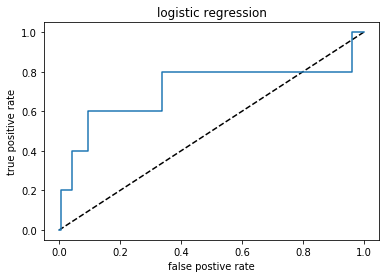

In [207]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("logistic regression")
plt.show()

In [208]:
#dumping the final model

In [209]:
joblib.dump(knn,'covid_brazil_semi_int_ward.obj')

['covid_brazil_semi_int_ward.obj']